# Neuer Datensatz
Data from https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
filename1 = "data/london_hourly/block_10.csv"
filename2 = "data/london_hourly/block_11.csv"
filename3 = "data/london_hourly/block_12.csv"

In [181]:
data1 = pd.read_csv(filename1)
data2 = pd.read_csv(filename2)
data3 = pd.read_csv(filename3)
data = pd.concat([data1,data2, data3], ignore_index=True) 
data = data.replace(to_replace='Null', value=np.nan).dropna()
data_numeric= pd.to_numeric(data['energy(kWh/hh)'][0:500000])
data_numeric = data_numeric * 20
data_numeric = data_numeric.astype(int)

/var/folders/tg/mc3m1mgs7yn6nbwlr7tzqxt80000gn/T/ipykernel_42202/2391611390.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv(filename3)


<AxesSubplot:>

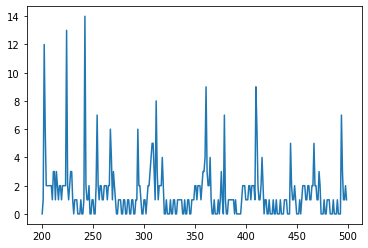

In [177]:
data_numeric[200:500].plot()

In [10]:
def get_data_differences(start, length):
    data_differences = [0]
    for i in range(start,start+length):
        data_differences.append(data_numeric[i] - data_numeric[i-1])
    return data_differences

In [13]:
data_differences = get_data_differences(1,9999);
probs = []
for i in range(-20,20):
    probs.append(np.sum(np.array(data_differences) == i))
sum_probs = sum(probs)
for i in range(len(probs)):
    probs[i] = float(probs[i])/sum_probs

In [23]:
def get_indices():
    indices = []
    np_data_numeric = np.array(data_numeric)
    for x in range(min(data_numeric), max(data_numeric)):
        index_x = []
        for i in range(len(data_numeric)-1):
            if np_data_numeric[i] == x:
                index_x.append(i)
        indices.append(index_x) 
    return indices
    
def get_data_difference_probabilities(indicies_x):
    data_differences = []
    for i in indicies_x:
        data_differences.append(data_numeric[i+1] - data_numeric[i])

    probs = []
    for change in range(-15,15):
        probs.append(np.sum(np.array(data_differences) == change))
    
    sum_probs = sum(probs)
    if sum_probs != 0:
        for i in range(len(probs)):
            probs[i] = float(probs[i])/sum_probs
        return probs
    else: return []
    
            
indices = get_indices()
probs = []
for x in range(0,30):
    probs.append(get_data_difference_probabilities(indices[x]))

<AxesSubplot:>

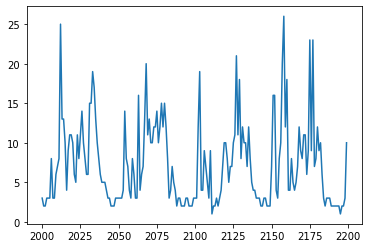

In [17]:
data_numeric[2000:2200].plot()

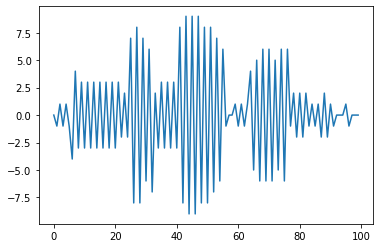

In [20]:
T = 100
values = [-5, -1, 0, 1, 5]
probs = [0.05, 0.1, 0.7, 0.1, 0.05]
v_step_change = np.random.choice(values, T, p=probs)

v_step = [0]
for i in range(1,T):
    v_step.append(-v_step[i-1] + v_step_change[i-1])
    
plt.plot(range(len(v_step)), v_step)

v = [8]
for i in range(1, T):
    v.append(v[i-1] + v_step[i-1])
#plt.plot(v)

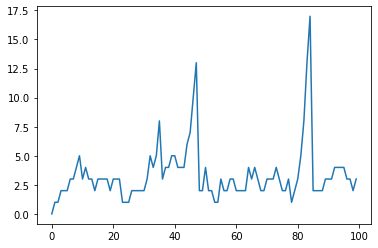

In [25]:
T = 100
values = range(-15,15)

v = [0]
for i in range(1, T):
    v_step = np.random.choice(values, 1, p=probs[v[-1]])[0]
    v.append(v[i-1] + v_step)
plt.plot(v)

In [213]:
import mchmm as mc

In [209]:
chain = mc.MarkovChain().from_data(data_numeric)

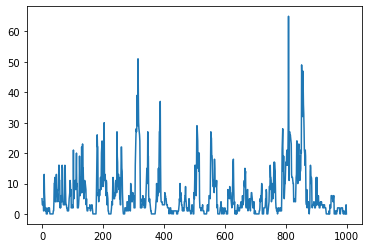

In [216]:
plt.plot(chain.simulate(n=1000, start=5)[0])

In [202]:
sum(np.array(chain.observed_p_matrix) > 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [201]:
chain.observed_p_matrix[-1][-2]

1.0

In [206]:
mc.simulate(5, chain.observed_p_matrix, 10)

AttributeError: module 'mchmm' has no attribute 'simulate'

In [ ]:
mc.MarkovChain.simulate()